In [1]:
import pandas as pd
import numpy as np
import os
import warnings 
warnings.filterwarnings('ignore')



# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# # Load all the accelerometer data
total_acc_x = pd.read_csv(r'UCI HAR Dataset\train\Inertial Signals\total_acc_x_train.txt',delim_whitespace=True,header=None) 
total_acc_y = pd.read_csv(r'UCI HAR Dataset\train\Inertial Signals\total_acc_y_train.txt',delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(r'UCI HAR Dataset\train\Inertial Signals\total_acc_z_train.txt',delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(r'UCI HAR Dataset\train\subject_train.txt',delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(r"UCI HAR Dataset\train\y_train.txt",delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#                                         Combining Test Data               
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(r"UCI HAR Dataset\test\Inertial Signals\total_acc_x_test.txt",delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(r"UCI HAR Dataset\test\Inertial Signals\total_acc_y_test.txt",delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(r"UCI HAR Dataset\test\Inertial Signals\total_acc_x_test.txt",delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(r'UCI HAR Dataset\test\subject_test.txt',delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(r"UCI HAR Dataset\test\y_test.txt",delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")


#-------------------------------------------------------------------------------------------------------------------------------

# MakeDataset.py
import warnings 
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

Done Combining the training data
Done Combining the testing data
Done Combining the data
Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


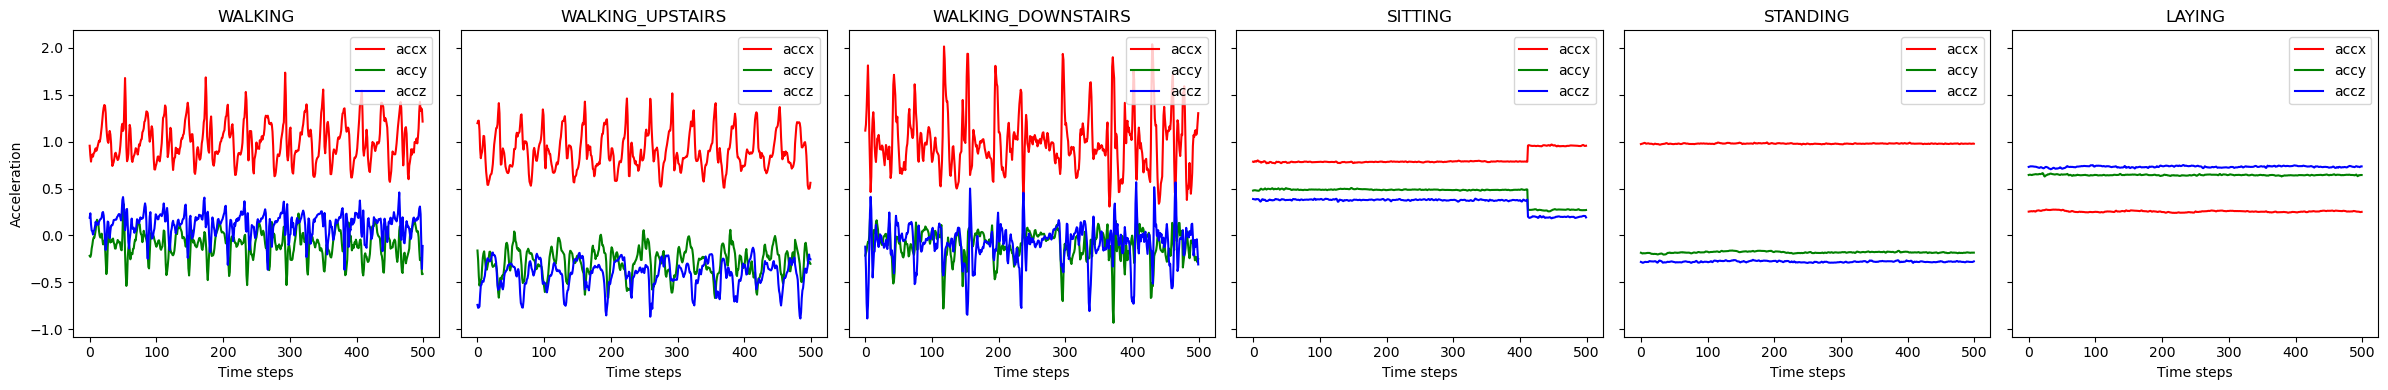

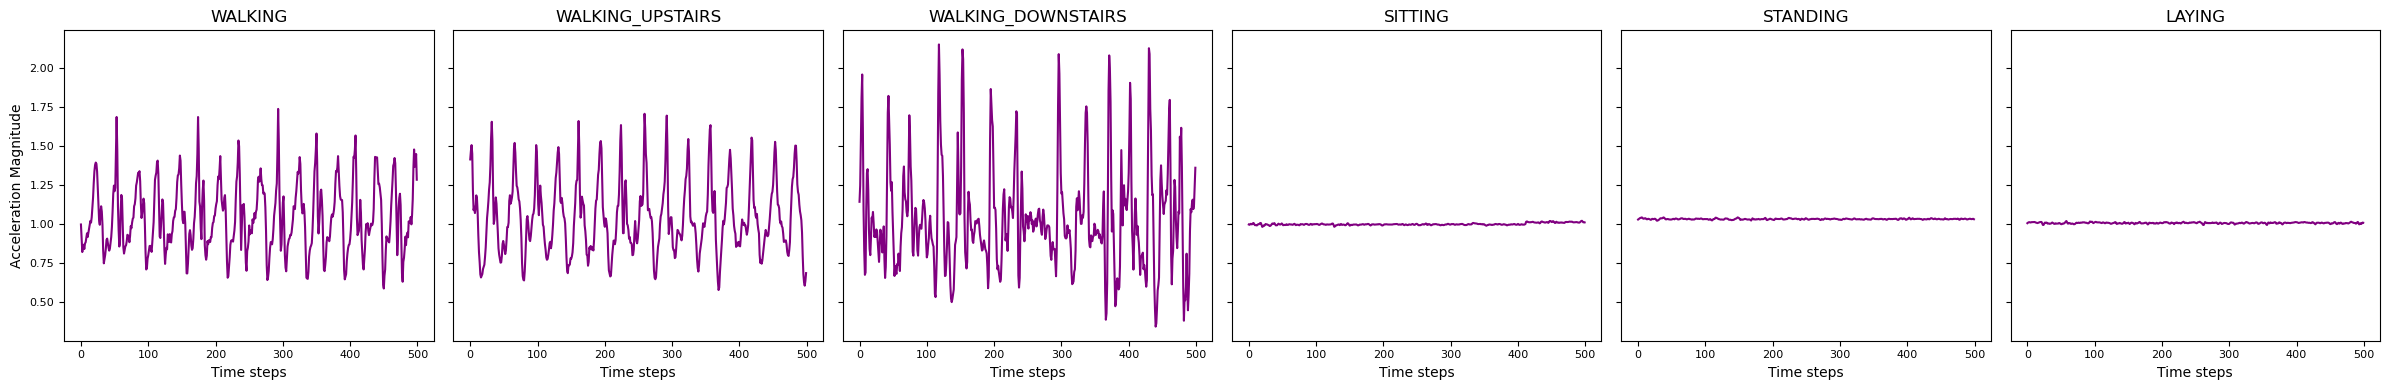

' Justification:\n\n    - Dynamic activities have more fluctuations and higher total acceleration values.\n    - Static activities show low, near-constant values.\n    - So, simple thresholding or rule-based approaches could separate static vs dynamic without a complex ML model.'

In [2]:
# Task 1 : Exploratory Data Analysis (EDA) 

""" 1.Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between 
   the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. the
    Do you think model will be able to classify the activities based on the data?"""



import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

activity_samples = {}
activity_names = {1:"WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LAYING"}


for class_label in np.unique(y_train):
    idx = np.where(y_train == class_label)[0][0] 
    activity_samples[class_label] = X_train[idx]

# Plotting
fig, axs = plt.subplots(1, 6, figsize=(24, 4), sharey=True)

for i, (label, sample) in enumerate(activity_samples.items()):
    axs[i].plot(sample[:, 0], label='accx', color='r')
    axs[i].plot(sample[:, 1], label='accy', color='g')
    axs[i].plot(sample[:, 2], label='accz', color='b')
    axs[i].set_title(activity_names[label])
    axs[i].set_xlabel("Time steps")
    if i == 0:
        axs[i].set_ylabel("Acceleration")
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()


# Differences:
    
""" Static activities(SITTING,STANDING,LAYING) will have relatively flat, low-variance signals.. 
    Dynamic activities (WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS) have more pronounced periodic oscillations."""

# Model classification feasibility:
"""  - Models (like Random Forests) can learn to detect patterns in these signals.
     - The differences in amplitude, periodicity, and variance are distinctive enough for good classification."""

""" 2.Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and 
    dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration 
    for each activity and justify your answer. """ 


# TO visualize the linear acceleration 
import numpy as np
import matplotlib.pyplot as plt

activity_names = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}


activity_samples = {}
for class_label in np.unique(y_train):
    idx = np.where(y_train == class_label)[0][0]  
    activity_samples[class_label] = X_train[idx]


fig, axs = plt.subplots(1, 6, figsize=(24, 4), sharey=True)

for i, (label, sample) in enumerate(activity_samples.items()):
    magnitude = np.sqrt(np.sum(sample**2, axis=1))
    axs[i].plot(magnitude, color='purple')
    axs[i].set_title(activity_names[label], fontsize=12)
    axs[i].set_xlabel("Time steps", fontsize=10)
    axs[i].tick_params(axis='x', labelsize=8)
    axs[i].tick_params(axis='y', labelsize=8)

    if i == 0:
        axs[i].set_ylabel("Acceleration Magnitude", fontsize=10)

plt.tight_layout()
plt.show()


""" Justification:

    - Dynamic activities have more fluctuations and higher total acceleration values.
    - Static activities show low, near-constant values.
    - So, simple thresholding or rule-based approaches could separate static vs dynamic without a complex ML model."""


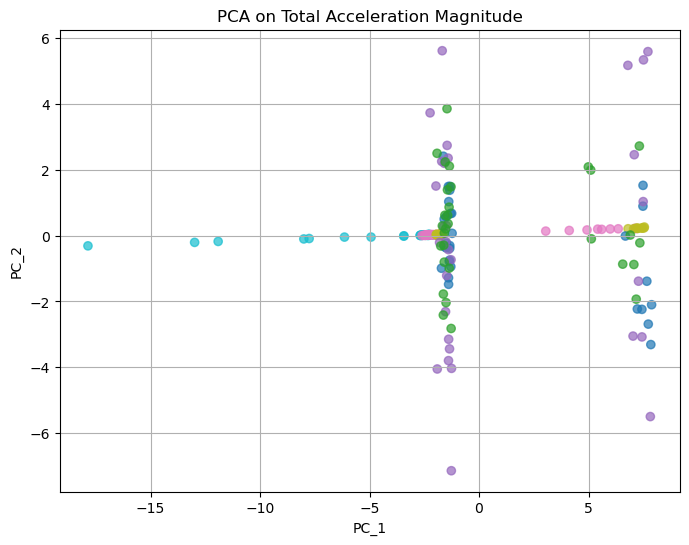

In [3]:
""" 3. Visualize the data using PCA.

- Use PCA (Principal Component Analysis) on Total Acceleration (accx**2+ accy**2+ accz**2) to compress the acceleration 
  timeseries into two features and plot a scatter plot to visualize different class of activities.
- Next, use TSFEL  to create features (your choice which ones you feel are useful) and then perform 
  PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
- Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize 
  different class of activities.
- Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better 
  for visualizing the data ? """ 


# A : PCA on Total Acceleration to compress the acceleration timeseries into two features


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

acc_magnitudes = []

for sample in X:               #  X = np.concatenate((X_train,X_test)) from final dataset
    val = np.sqrt(np.sum(sample**2, axis=1)) 
    acc_magnitudes.append(val)

acc_magnitudes = np.array(acc_magnitudes)  

pca = PCA(n_components=2)  # call the PCA 
X_pca_acc = pca.fit_transform(acc_magnitudes)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_acc[:, 0], X_pca_acc[:, 1], c=y, cmap='tab10', alpha=0.7)   # y = np.concatenate((y_train,y_test)) 
plt.title('PCA on Total Acceleration Magnitude')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.grid(True)
plt.show()

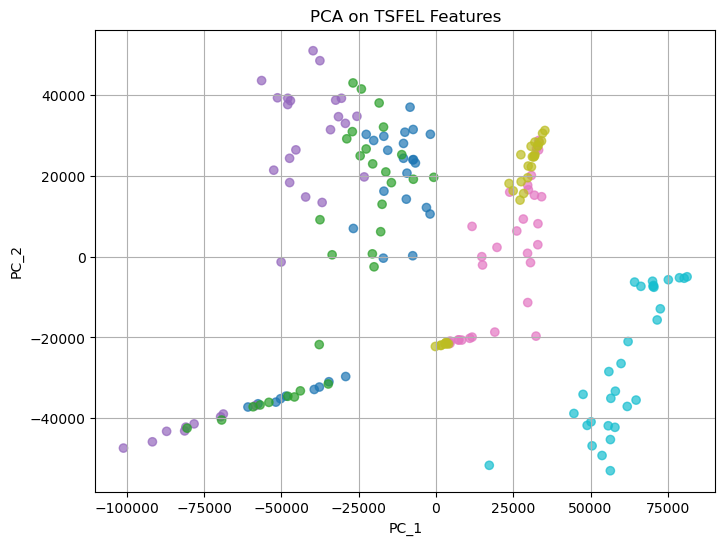

In [4]:
# B : use TSFEL  to create features and then perform PCA to obtain two features


# !pip install tsfel  
import tsfel
import tsfel
import pandas as pd


cfg = tsfel.get_features_by_domain()  # full set of common features

 
tsfel_features = []
for sample in X:                          #  X = np.concatenate((X_train,X_test)) from final dataset
    df_sample = pd.DataFrame(sample, columns=['accx', 'accy', 'accz'])
    features = tsfel.time_series_features_extractor(cfg, df_sample, verbose=0)
    tsfel_features.append(features)

tsfel_features = pd.concat(tsfel_features, ignore_index=True)
tsfel_features = tsfel_features.fillna(0)


pca = PCA(n_components=2) # call the PCA
X_pca_tsfel = pca.fit_transform(tsfel_features)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_tsfel[:, 0], X_pca_tsfel[:, 1], c=y, cmap='tab10', alpha=0.7) # y = np.concatenate((y_train,y_test))
plt.title('PCA on TSFEL Features')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.grid(True)
plt.show()

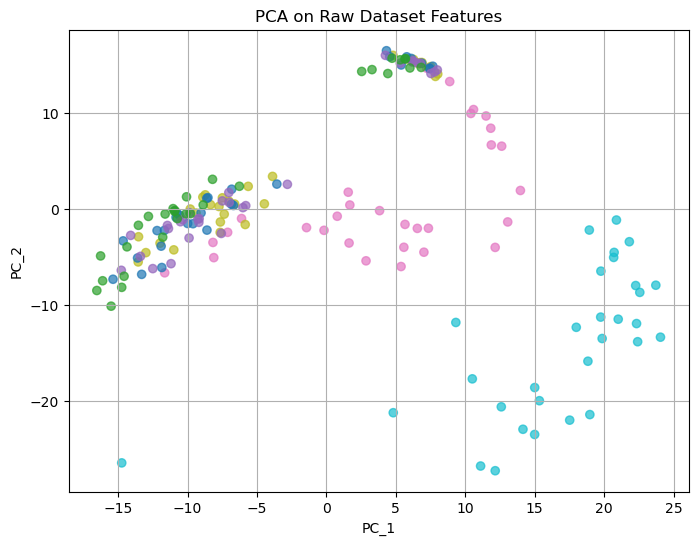

In [5]:
    
# C: The features provided by the dataset and perform PCA to obtain two features

X_reshape = X.reshape(X.shape[0], -1)    # reshape the X  


pca = PCA(n_components=2) # call the PCA
X_pca = pca.fit_transform(X_reshape)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7) # y = np.concatenate((y_train,y_test))
plt.title('PCA on Raw Dataset Features')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.grid(True)
plt.show()

In [7]:

# D : Compare the results of PCA on Total Acceleration, TSFEL and the dataset features

""" - Using total acceleration for PCA shows basic differences between activities. 
    - TSFEL features capture more details and separate activities better. 
    - Raw data PCA works but is often noisy and harder to understand.
    - Also,TSFEL looks at patterns like averages and frequencies in the data. 
      This helps the model see differences more clearly. 
      So, using TSFEL features usually gives the best view of how activities differ."""


"""4.Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. 
Identify the features that are highly correlated with each other. Are there any redundant features? """

import pandas as pd
import numpy as np

combined_features = pd.concat([tsfel_features, pd.DataFrame(X_reshape)], axis=1)
# 1. Compute correlation matrix
corr_matrix = combined_features.corr()

# 2. Take the upper triangle only (to avoid duplicates and self-correlations)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Find highly correlated pairs directly
high_corr_pairs = (
    upper_tri.stack()
    .reset_index()
    .rename(columns={"level_0": "Feature1", "level_1": "Feature2", 0: "Correlation"})
)

# 4. Filter for correlation > 0.9
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"].abs() > 0.9]

print(high_corr_pairs)
print(f"Total number of highly correlated pairs: {len(high_corr_pairs)}")


                     Feature1                   Feature2  Correlation
0        accx_Absolute energy  accx_Area under the curve     0.982324
2        accx_Absolute energy         accx_Average power     1.000000
5        accx_Absolute energy     accx_ECDF Percentile_1     0.973108
39       accx_Absolute energy                  accx_Mean     0.973150
43       accx_Absolute energy                accx_Median     0.950792
...                       ...                        ...          ...
1865327                  1493                       1496     0.993472
1865330                  1493                       1499     0.980683
1865333                  1494                       1497     0.979339
1865338                  1495                       1498     0.987841
1865342                  1496                       1499     0.992637

[166137 rows x 3 columns]
Total number of highly correlated pairs: 166137


In [8]:
# Task 2 : Decision Trees for Human Activity Recognition


""" 1 .Use Sklearn Library to train Decision Tress. 
 - Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of 
   the model.
 - Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix
   of the model.
 - Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion
   matrix of the model.
 - Compare the results of the three models. Which model do you think is better?"""




from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import numpy as np

from sklearn.model_selection import train_test_split
seed = 4

# raw accelerometer data
X_raw = X.reshape(X.shape[0], -1)  
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y, test_size=0.3, random_state=seed)


clf = DecisionTreeClassifier(random_state=42) # Initialize Decision Tree

clf.fit(X_train_raw, y_train_raw) # Train the model

y_pred_raw = clf.predict(X_test_raw) # Predict on test set

# Calculate metrics
accuracy = accuracy_score(y_test_raw, y_pred_raw)
precision = precision_score(y_test_raw, y_pred_raw, average='weighted')
recall = recall_score(y_test_raw, y_pred_raw, average='weighted')
conf_matrix = confusion_matrix(y_test_raw, y_pred_raw)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.4815
Precision: 0.4433
Recall: 0.4815
Confusion Matrix:
[[ 0  3  2  0  2  0]
 [ 2  1  1  0  1  0]
 [ 2  5  1  1  4  0]
 [ 0  0  0  9  0  0]
 [ 0  1  0  4  3  0]
 [ 0  0  0  0  0 12]]


Accuracy (TSFEL Features): 0.8889
Precision (TSFEL Features): 0.8962
Recall (TSFEL Features): 0.8889
Confusion Matrix (TSFEL Features):
[[7 1 1 0 0 0]
 [1 8 0 0 0 0]
 [0 2 7 0 0 0]
 [0 0 0 8 1 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]
Accuracy (TSFEL Features): 0.6481
Precision (TSFEL Features): 0.6034
Recall (TSFEL Features): 0.6481
Confusion Matrix (TSFEL Features):
[[3 2 1 3 0 0]
 [1 6 1 0 1 0]
 [4 2 1 1 0 1]
 [0 0 0 8 1 0]
 [0 1 0 0 8 0]
 [0 0 0 0 0 9]]


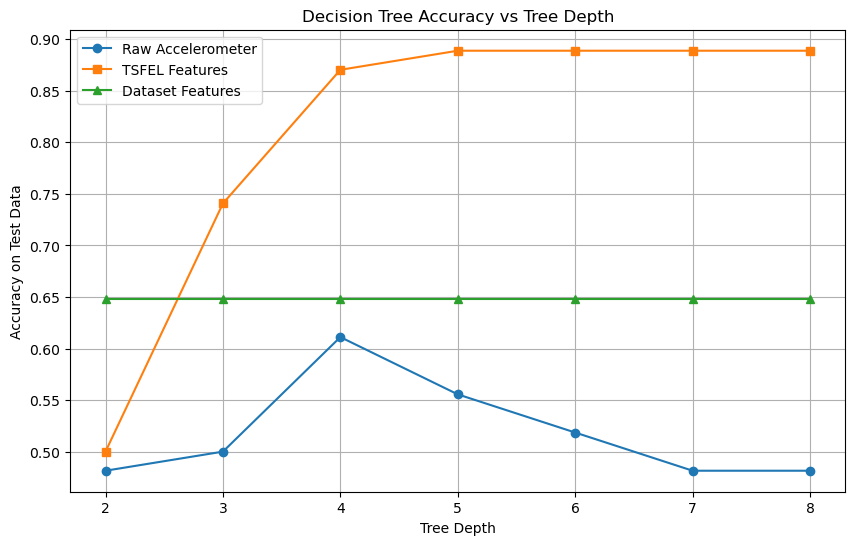

'3.Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?\n\n-The model may perform poorly on some activities like sitting vs standing because their sensor signals are very similar.\n\n-Performance can vary across participants due to differences in how they perform activities or sensor placement.\n\n-Noisy data, imbalanced samples, or inter-subject variability also cause lower accuracy for certain classes or people.'

In [9]:
# TSFEL features split
X_train_tsfel, X_test_tsfel, y_train_tsfel, y_test_tsfel = train_test_split(tsfel_features, y, test_size=0.3, random_state=seed, stratify=y)


clf_tsfel = DecisionTreeClassifier(random_state=42) # Initialize Decision Tree

clf_tsfel.fit(X_train_tsfel, y_train_tsfel) # Train the model on TSFEL features

y_pred_tsfel = clf_tsfel.predict(X_test_tsfel) # Predict on test data

# Calculate metrics
accuracy_tsfel = accuracy_score( y_test_tsfel, y_pred_tsfel)
precision_tsfel = precision_score( y_test_tsfel, y_pred_tsfel, average='weighted')
recall_tsfel = recall_score( y_test_tsfel, y_pred_tsfel, average='weighted')
conf_matrix_tsfel = confusion_matrix( y_test_tsfel, y_pred_tsfel)

# Print results
print(f"Accuracy (TSFEL Features): {accuracy_tsfel:.4f}")
print(f"Precision (TSFEL Features): {precision_tsfel:.4f}")
print(f"Recall (TSFEL Features): {recall_tsfel:.4f}")
print("Confusion Matrix (TSFEL Features):")
print(conf_matrix_tsfel)


# Dataset features split
X_train_dataset, X_test_dataset, y_train_dataset, y_test_dataset = train_test_split(X_reshape, y, test_size=0.3, random_state=seed, stratify=y)



clf_dataset = DecisionTreeClassifier(random_state = 42) # Initialize Decision Tree
clf_dataset.fit(X_train_dataset,y_train_dataset)  # Train the model

y_pred_dataset = clf_dataset.predict(X_test_dataset)

# Calculate metrics
accuracy_dataset = accuracy_score( y_test_dataset, y_pred_dataset)
precision_dataset = precision_score( y_test_dataset, y_pred_dataset, average='weighted')
recall_dataset = recall_score( y_test_dataset, y_pred_dataset, average='weighted')
conf_matrix_dataset = confusion_matrix( y_test_dataset, y_pred_dataset)

# Print results
print(f"Accuracy (TSFEL Features): {accuracy_dataset:.4f}")
print(f"Precision (TSFEL Features): {precision_dataset:.4f}")
print(f"Recall (TSFEL Features): {recall_dataset:.4f}")
print("Confusion Matrix (TSFEL Features):")
print(conf_matrix_dataset)



""" Compare the results of the three models. Which model do you think is better?

Answer : - If TSFEL features show higher accuracy, precision, and recall, they are the better choice for classification.

        - Raw data might be useful with more complex models (like deep learning) but less so for simple decision trees.

        - Dataset-provided features can be a good baseline but might not capture all the nuances TSFEL does."""




"""  2 .Train Decision Tree with varying depths (2-8) using all above 3 methods. 
        Plot the accuracy of the model on test data vs the depth of the tree     """

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = range(2, 9)  # depths from 2 to 8

acc_raw = []
acc_tsfel = []
acc_ds = []

for depth in depths:
    clf_raw = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_raw.fit(X_train_raw, y_train_raw)
    y_pred_raw = clf_raw.predict(X_test_raw)
    acc_raw.append(accuracy_score(y_test_raw, y_pred_raw))
    
    # TSFEL features
    clf_tsfel = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_tsfel.fit(X_train_tsfel, y_train_tsfel)
    y_pred_tsfel = clf_tsfel.predict(X_test_tsfel)
    acc_tsfel.append(accuracy_score(y_test_tsfel, y_pred_tsfel))
    
    # Dataset features
    clf_ds = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_ds.fit(X_train_dataset, y_train_dataset)
    y_pred_ds = clf_ds.predict(X_test_dataset)
    acc_ds.append(accuracy_score(y_test_dataset, y_pred_dataset))

    
# Plot the accuracy of the model on test data vs the depth of the tree  
plt.figure(figsize=(10,6))
plt.plot(depths, acc_raw, marker='o', label='Raw Accelerometer')
plt.plot(depths, acc_tsfel, marker='s', label='TSFEL Features')
plt.plot(depths, acc_ds, marker='^', label='Dataset Features')

plt.title("Decision Tree Accuracy vs Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy on Test Data")
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

"""3.Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?

-The model may perform poorly on some activities like sitting vs standing because their sensor signals are very similar.

-Performance can vary across participants due to differences in how they perform activities or sensor placement.

-Noisy data, imbalanced samples, or inter-subject variability also cause lower accuracy for certain classes or people."""

In [10]:
# # Task 3 : Data Collection in the Wild


"""1. Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed.
Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use
a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, 
ensuring that your test data is similar to your training data. How did the model perform?"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. Load the three activity files

df_standing = pd.read_csv("standing.csv")
df_sitting  = pd.read_csv("Sitting.csv")
df_walking  = pd.read_csv("Walking.csv")


# 2. Assign labels

df_standing["label"] = "STANDING"
df_sitting["label"]  = "SITTING"
df_walking["label"]  = "WALKING"


# 3. Combine into one dataset


df_all = pd.concat([df_standing, df_sitting, df_walking], ignore_index=True)
df_all = df_all.sample(frac=1, random_state=42).reset_index(drop=True)

#  split into features and labels
X = df_all.drop("label", axis=1).values
y = df_all["label"].values


print("Dataset shape:", X.shape, "Labels:", np.unique(y))


# 4. Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# 5. Train a Decision Tree model

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


# 6. Evaluate


y_pred = clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Dataset shape: (1503, 5) Labels: ['SITTING' 'STANDING' 'WALKING']

Accuracy: 0.9977827050997783
Confusion Matrix:
 [[150   0   0]
 [  0 150   0]
 [  0   1 150]]
Classification Report:
               precision    recall  f1-score   support

     SITTING       1.00      1.00      1.00       150
    STANDING       0.99      1.00      1.00       150
     WALKING       1.00      0.99      1.00       151

    accuracy                           1.00       451
   macro avg       1.00      1.00      1.00       451
weighted avg       1.00      1.00      1.00       451

